# Step 0: Preparation for labeling

**Before you start labeling, please make sure the following steps are taken:**

0. You have **deleted all old/useless images in folder "images_to_be_labeled"** and **deleted all old/useless label CSV files in folder "labels"**;
1. You have downloaded your responsible dataset packet from Google Drive, and have copied **ALL images** from it to the folder "images_to_be_labeled";
2. You have indicated on the **spreadsheet** that you have downloaded your responsible dataset packet for labeling;
3. You have run **"git pull"** to obtain the latest code (if applicable) for dataset labeling;
4. You have **sufficient time and energy** to complete the labeling (ideally in one go);
5. **DON'T close the Windows Powershell** unless you have completed all labeling (as it will shutdown your kernel).

*TIP:* Select a cell, and press **"Ctrl+Enter"** to run that cell.


# Step 0.5: Import all necessary packages / libraries

In [10]:
# Import Packages

# !git pull

import os
import pandas as pd
from IPython.display import display, Image
%load_ext autoreload
%autoreload 2

%matplotlib inline

from utils import *
print("All libraries imported correctly - ready for the next step!")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
All libraries imported correctly - ready for the next step!


# Step 1: Enter your information (Name + Dataset ID)

In [14]:
# Your OS

labeler_os = input("Please input your computer Operating System (Windows, Mac, Linux): ")
while labeler_os not in ["Windows", "Mac", "Linux"]:
    labeler_os = input("Invalid input Operating System! Please type one of the following (Windows, Mac, Linux): ")

# Your name
labeler_name = input("Please input your preferred name WITHOUT any space: ")
dataset_id = input("Please input dataset ID: ")
print("")
print("All information recorded - ready for the next step!")

Please input your computer Operating System (Windows, Mac, Linux): Windows
Please input your preferred name WITHOUT any space: 12f
Please input dataset ID: f3

All information recorded - ready for the next step!


# Step 2: Retrieve images and set up labeling file

**Please make sure you have put ALL images to be labeled in the "images_to_be_labeled" folder!**


In [15]:
# TODO: Fetch image directories

images = get_all_files("../images_to_be_labeled/", "*.jpg")


# TODO: assemble list of labels to use as options in the manual labeling process

# Primary Functional Basis (Tier 1)
functional_basis_tier1 = ["branch", "control magnitude", "convert", "provision",
                         "signal", "support", "channel", "connect"]


print("Number of images retrieved: ", len(images))
    
label_info = labeler_name + "-dataset" + dataset_id
LABELS_FINAL_OUT_DIR = f"../labels/{label_info}.csv"

LABELS_FINAL_OUT_DIR = Path(LABELS_FINAL_OUT_DIR)

if not LABELS_FINAL_OUT_DIR.exists():
    df = pd.DataFrame(list(), columns=['Assembly_Name', 'Body_Name', 'Label_Tier1', 
                                                       'Label_Tier2', 'Label_Tier3'])
    df.to_csv(f"../labels/{label_info}.csv")
    
print("Ready for labeling!")

Number of images retrieved:  67
Ready for labeling!


# Step 2: Start manual labeling
## Note: You may restart this code cell (Ctrl+Enter) any time to resume labeling

[Progress: 2/67]
--------------------------
Functional Basis (Tier 2):


--------------------------
Additional Options (Tier 2):


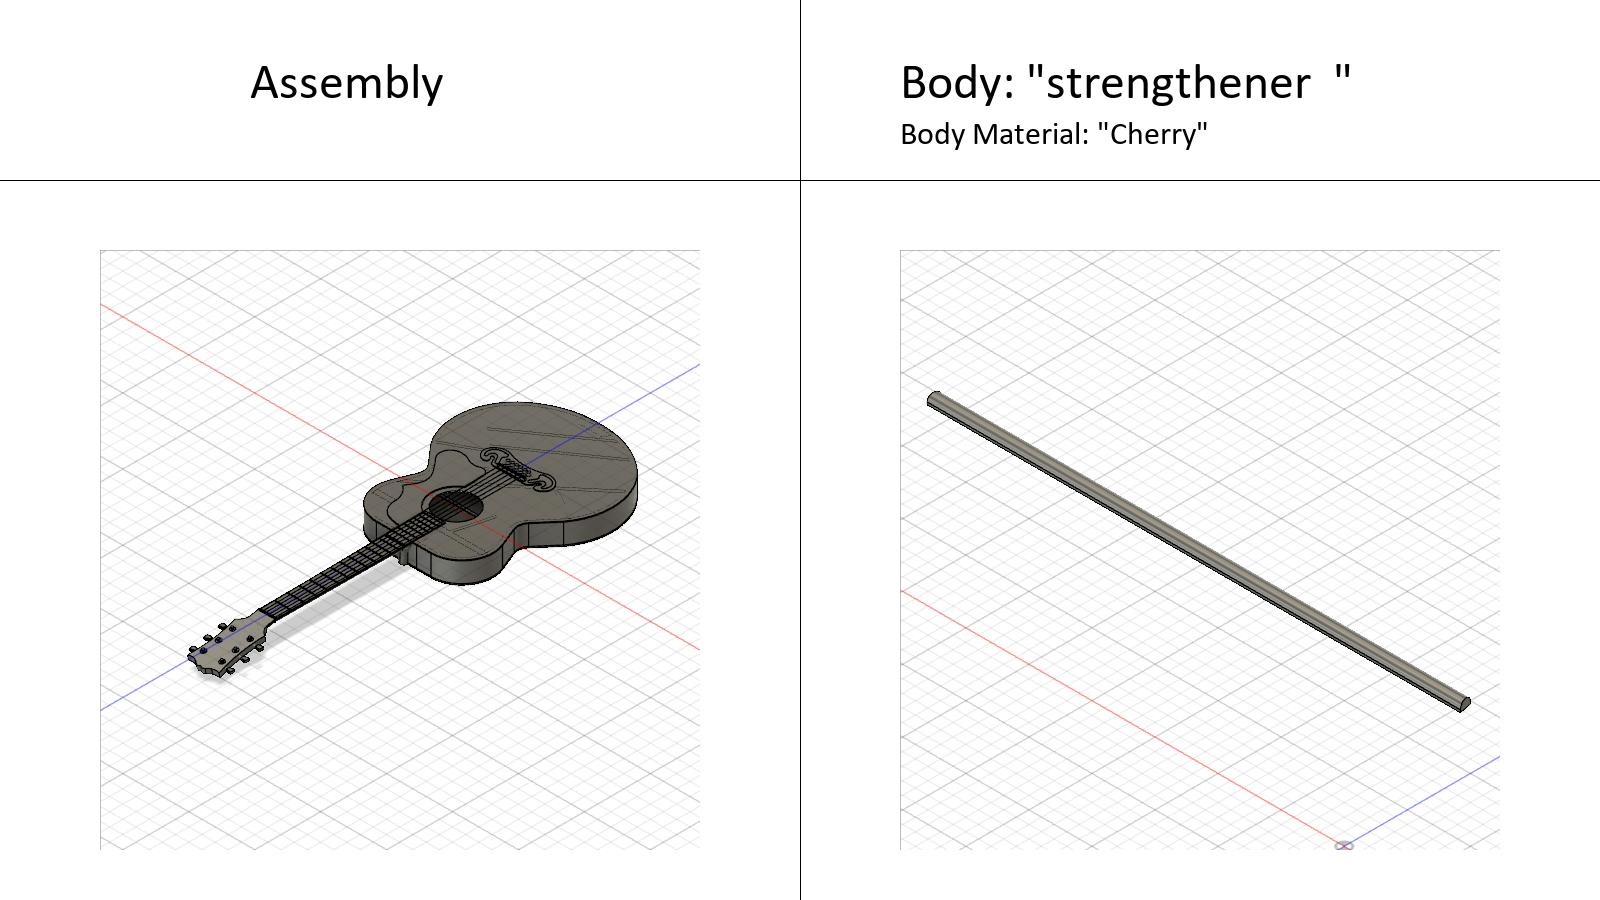

In [16]:
# Start manually labeling

images = get_all_files("../images_to_be_labeled/", "*.jpg")

annotations = annotate_functional_basis(
    operating_sys = labeler_os,
    label_info = LABELS_FINAL_OUT_DIR,
    examples = images,
    options_1 = functional_basis_tier1,
    display_fn=lambda filename: display(Image(filename))
)


# Step 3: Upload your labels to the Google Drive

1. Please make sure that you labeled **ALL images** that are to be labeled. (Note: you can check this by re-running the previous cell using Ctrl+Enter)

2. Please make sure that you upload the CSV file **"\[your name\]-dataset\[ID\].csv"** to the corresponding folder on Google Drive.

3. Please also make sure you indicate that you have **"Finished Labeling"** your dataset on the spreadsheet.

# Annotation Finished - Thank You!